In [39]:
from urllib.request import urlopen

# urllib2 is used to download the html content of the web link

response = urlopen("http://python.org/")

# You can read the entire content of a file using the read() method

html = response.read().decode("utf-8")
print(len(html))

50971


In [40]:
# Regular Expression-based split the string (different from python)

tokens = [tok for tok in html.split()]


print("Total no of tokens :" + str(len(tokens)))

# First 100 tokens

import re

# using the split function

# https://docs.python.org/2/library/re.html

tokens = re.split("\W+", html)

Total no of tokens :3001


In [41]:
import nltk
from bs4 import BeautifulSoup

#http://www.nltk.org/api/nltk..html#nltk.util.clean_html

clean = BeautifulSoup(html).get_text()

#clean will have entire string removing all the html noise

tokens = [tok for tok in clean.split()]

print(tokens[:100])

['Welcome', 'to', 'Python.org', '{', '"@context":', '"https://schema.org",', '"@type":', '"WebSite",', '"url":', '"https://www.python.org/",', '"potentialAction":', '{', '"@type":', '"SearchAction",', '"target":', '"https://www.python.org/search/?q={search_term_string}",', '"query-input":', '"required', 'name=search_term_string"', '}', '}', 'var', '_gaq', '=', '_gaq', '||', '[];', "_gaq.push(['_setAccount',", "'UA-39055973-1']);", "_gaq.push(['_trackPageview']);", '(function()', '{', 'var', 'ga', '=', "document.createElement('script');", 'ga.type', '=', "'text/javascript';", 'ga.async', '=', 'true;', 'ga.src', '=', "('https:'", '==', 'document.location.protocol', '?', "'https://ssl'", ':', "'http://www')", '+', "'.google-analytics.com/ga.js';", 'var', 's', '=', "document.getElementsByTagName('script')[0];", 's.parentNode.insertBefore(ga,', 's);', '})();', 'Notice:', 'While', 'JavaScript', 'is', 'not', 'essential', 'for', 'this', 'website,', 'your', 'interaction', 'with', 'the', 'conten

In [42]:
import operator
freq_dist = {}

for tok in tokens:
    if tok in freq_dist:
        freq_dist[tok]+=1
    else:
        freq_dist[tok]=1
        
#we want to sort this dictionary on values (freq in tihs case)

sorted_freq_dist = sorted(freq_dist.items(), key=operator.itemgetter(1),reverse=True)
print(sorted_freq_dist[:25])

[('Python', 56), ('>>>', 24), ('and', 24), ('the', 20), ('to', 15), ('=', 14), ('of', 12), ('News', 11), ('Events', 11), ('is', 10), ('for', 10), ('Software', 9), ('#', 9), ('More', 9), ('with', 8), ('PSF', 8), ('a', 8), ('3', 8), ('in', 8), ('Community', 7), ('Docs', 6), ('Guide', 6), ('The', 5), ('Stories', 5), ('1', 5)]


In [43]:
#A better and more efficient approach to the above

import nltk

Freq_dist_nltk = nltk.FreqDist(tokens)

print(Freq_dist_nltk)

for k,v in Freq_dist_nltk.items():
    print(str(k)+':'+str(v))
    
    

<FreqDist with 600 samples and 1100 outcomes>
Welcome:1
to:15
Python.org:1
{:3
"@context"::1
"https://schema.org",:1
"@type"::2
"WebSite",:1
"url"::1
"https://www.python.org/",:1
"potentialAction"::1
"SearchAction",:1
"target"::1
"https://www.python.org/search/?q={search_term_string}",:1
"query-input"::1
"required:1
name=search_term_string":1
}:2
var:3
_gaq:2
=:14
||:3
[];:1
_gaq.push(['_setAccount',:1
'UA-39055973-1']);:1
_gaq.push(['_trackPageview']);:1
(function():1
ga:1
document.createElement('script');:1
ga.type:1
'text/javascript';:1
ga.async:1
true;:1
ga.src:1
('https:':1
==:1
document.location.protocol:1
?:1
'https://ssl':1
::1
'http://www'):1
+:1
'.google-analytics.com/ga.js';:1
s:1
document.getElementsByTagName('script')[0];:1
s.parentNode.insertBefore(ga,:1
s);:1
})();:1
Notice::1
While:1
JavaScript:2
is:10
not:1
essential:1
for:10
this:1
website,:1
your:4
interaction:1
with:8
the:20
content:2
will:1
be:3
limited.:1
Please:1
turn:1
on:3
full:1
experience.:1
Skip:1
▼:1
Close:

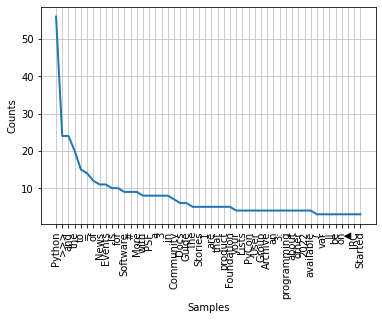

<AxesSubplot: xlabel='Samples', ylabel='Counts'>

In [44]:
import matplotlib.pyplot as plt
Freq_dist_nltk.plot(50, cumulative=False)
# below is the plot for the frequency distrobutions


In [50]:
#Remove stop words using nltk

import nltk

stop_words = [word.strip().lower() for word in open("PATH/english.stop.txt")]

clean_tokens = [tok for tok in tokens if len(tok.lower())>1 and (tok.lower() not in stop_words)]

Freq_dist_nltk = nltk.FreqDist(clean_tokens)

Freq_dist_nltk.plot(50, cumulative = False)


FileNotFoundError: [Errno 2] No such file or directory: 'PATH/english.stop.txt'